In [1]:
import warnings
warnings.filterwarnings('ignore')



# SKLearn Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression , Perceptron

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC

# SKLearn ensemble classifiers
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier , BaggingClassifier
from sklearn.ensemble import VotingClassifier , AdaBoostClassifier

# SKLearn Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# plot functions
import plotFunctions as pfunc
import dataFunctions as dfunc

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\Users\lvarr\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
full = dfunc.loadData()

In [3]:
full.keys()



Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [4]:



full=dfunc.featureProcessing(full)

Process  Step 1 : Sex  : Concluded!
Process  Converting Sex to num  : Concluded!
Process  Step 2 : Titles  : Concluded!
Process  Processing Title  : Concluded!
Process  Step 3 : Deck  : Concluded!
Process  Deck  : Concluded!
Process  Step 4 : Ticket  : Concluded!
Process  Ticket number  : Concluded!
Process  Step 5 : Fare  : Concluded!
Process  Converting Fare  : Concluded!
Process  Step 4_ : Ticket  : Concluded!
Process  Ticket Grouping  : Concluded!
Process  Step 5_ : Fare  : Concluded!
Process  Ticket group  : Concluded!
Process  Step 6 : Family Size  : Concluded!
Process  Family Size  : Concluded!
Process  Step 7 : Embarked  : Concluded!
Process  Embarked  : Concluded!
Process  Step 9 : Name Size  : Concluded!
Process  Name Size  : Concluded!
Process  Step 10: Childhood  : Concluded!
Process  Step 8 : Age  : Concluded!
Process  Preprocessing done !  : Concluded!


In [5]:
#full = dfunc.fillAge(full)
full["Title"]
#full["Pclass"]
#full["Sex"]

0       2
1       3
2       1
3       3
4       2
5       2
6       2
7       0
8       3
9       3
10      1
11      1
12      2
13      2
14      1
15      3
16      0
17      2
18      3
19      3
20      2
21      2
22      1
23      2
24      1
25      3
26      2
27      2
28      1
29      2
       ..
1279    2
1280    0
1281    2
1282    3
1283    0
1284    2
1285    2
1286    3
1287    2
1288    3
1289    2
1290    2
1291    1
1292    2
1293    1
1294    2
1295    2
1296    2
1297    2
1298    2
1299    1
1300    1
1301    1
1302    3
1303    1
1304    2
1305    5
1306    2
1307    2
1308    0
Name: Title, Length: 1309, dtype: int64

In [6]:
print(full.isnull().sum())

Age                 0
Cabin            1014
Embarked            0
Fare                0
Name                0
Parch               0
PassengerId         0
Pclass              0
SibSp               0
Survived          418
Ticket              0
Sex                 0
Title               0
Master              0
Miss                0
Mr                  0
Mrs                 0
Officer             0
Royalty             0
Deck                0
TicketNumber        0
Shared_ticket       0
Ticket_group        0
Fare_cat            0
Fare_eff            0
Fare_eff_cat        0
Family              0
FsizeD              0
NameLength          0
NlengthD            0
Child               0
Young               0
Adult               0
dtype: int64


In [7]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 33 columns):
Age              1309 non-null float64
Cabin            295 non-null object
Embarked         1309 non-null int64
Fare             1309 non-null float64
Name             1309 non-null object
Parch            1309 non-null int64
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
SibSp            1309 non-null int64
Survived         891 non-null float64
Ticket           1309 non-null object
Sex              1309 non-null int64
Title            1309 non-null int64
Master           1309 non-null uint8
Miss             1309 non-null uint8
Mr               1309 non-null uint8
Mrs              1309 non-null uint8
Officer          1309 non-null uint8
Royalty          1309 non-null uint8
Deck             1309 non-null int64
TicketNumber     1309 non-null float64
Shared_ticket    1309 non-null int32
Ticket_group     1309 non-null int64
Fare_cat         1309 non-null in

In [8]:
#full["Title"].head(50)

In [9]:
test = full.head(891)
titanic = full.iloc[891:]

In [10]:
parameters = {'bootstrap': True,
              'max_depth': 6, 
              'max_features': 'auto', 
              'min_samples_leaf': 1, 
              'min_samples_split': 10, 
              'n_estimators': 100,
              'n_jobs': -1
             }
rf = RandomForestClassifier(**parameters)

In [11]:
predictors = ["Age",
            "Embarked",
            "Fare",
            "Pclass",
            "Sex",
            "SibSp",
            "Parch",
            "Deck",
            "Family",
            "FsizeD",
            "NameLength",
            "NlengthD",
            "Title",
            "TicketNumber",
            "Master",
            "Miss",
            "Mr",
            "Mrs",
            "Officer",
            "Royalty",
            "Shared_ticket",
            "Ticket_group",
            "Fare_cat",
            "Fare_eff",
            "Fare_eff_cat",
            "Child",
            #"Young",
            "Adult"
             ]

In [12]:
test = full.head(891)
titanic = full.iloc[891:]

In [13]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit

In [14]:
rf.fit(test[predictors],test["Survived"])

kf = KFold(test.shape[0], n_folds=10, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)

In [15]:
predictions = cross_validation.cross_val_predict(rf, test[predictors],test["Survived"],cv=kf)
predictions = pd.Series(predictions)
scores = cross_val_score(rf, test[predictors], test["Survived"],scoring='accuracy', cv=kf)

In [16]:
print(scores)
print(scores.mean())

[ 0.81111111  0.86516854  0.7752809   0.86516854  0.87640449  0.83146067
  0.80898876  0.79775281  0.86516854  0.83146067]
0.83279650437


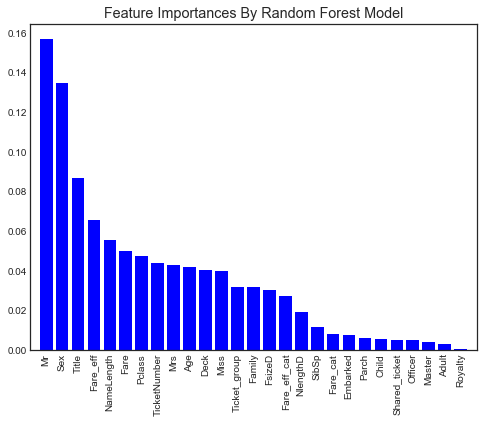

In [17]:
from sklearn.grid_search import GridSearchCV

importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns
plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

In [18]:
output = rf.predict(titanic[predictors]).astype(int)
df_out = pd.DataFrame()

In [19]:
df_out['PassengerId']=titanic['PassengerId']

In [20]:
df_out['Survived'] = output

In [21]:
#df_out[['PassengerId','Survived']].to_csv('./output/output-20171015.csv',index=False)